# Structure de communauté

Dans le chapitre précédent, nous avons proposé comme critère pour un bon positionnement de graphe qu'il faisait apparaître des "communautés" mais sans définir ce terme. La définition de communauté et les algorithmes de détection constituent un champ entier de la recherche sur les graphes, dont ce chapitre tente de donner un aperçu.

## Définition (?)

Une chose sur laquelle s'accordent tous les articles sur les communautés est que le concept est très large et regroupe des dizaines de définitions différentes ! Je propose ici trois catégories principales de définitions.

1. Une communauté est une région du graphe dense en liens ([cliques](https://fr.wikipedia.org/wiki/Clique_(th%C3%A9orie_des_graphes)), k-cliques)
1. Une communauté est une région du graphe dense en liens et peu connectée avec le reste ([modularité](https://fr.wikipedia.org/wiki/Modularit%C3%A9_(r%C3%A9seaux)))
1. Une communauté est un ensemble de points proches suivant une distance donnée (définition d'une certaine manière liée à la notion de layout).

Ces catégories peuvent se recouper, mais je trouve qu'elles permettent de se faire une idée du type de communauté auquel on a affaire quand on en rencontre.

## Approches

Les catégories précédentes sont vagues, et l'on peut chercher à les concrétiser de différentes manières en fonction des besoins. Voici plusieurs approches cherchant à définir des communautés dans l'ensemble du graphe.

1. Approche par [partitionnement](https://fr.wikipedia.org/wiki/Partitionnement_de_graphe) : chaque noeud appartient à une et une seule communauté. Le graphe est donc divisé en plusieurs communautés.
1. Approche hiérarchique divisive : le graphe est partitionné et chaque partition est elle-même partitionnée jusqu'à ce que chaque partition ne contienne plus qu'un noeud ([regroupement hiérarchique](https://fr.wikipedia.org/wiki/Regroupement_hi%C3%A9rarchique)). On obtient ainsi un arbre de partitionnement.
1. Approche hiérarchique agglomérative : également un arbre de partitionnement, mais obtenu en agglomérant les communautés ne contenant qu'un seul noeud entre elles jusqu'à n'avoir plus qu'une communauté les contenant tous.
1. Approche par communautés recouvrantes : on ne cherche pas de partitionnement, mais un ensemble de communautés qui peuvent se recouvrir.

Chaque approche a ses avantages et inconvénients, et nous discuterons de certains à travers le prisme des données de la monnaie ğ1.

## Cas de la toile de confiance ğ1

La monnaie ğ1 utilise une toile de confiance définie par le protocole Duniter comme base d'identification pour son dividende universel (cf chapitre 02). Les membres acceptent une charte stipulant qu'ils ne certifieront que des personnes qu'ils connaissent en personne, on peut donc supposer que la plupart des certifications ont un caractère géographique, les autres étant liées à des voyages lors d'événements par exemple. Ces événements peuvent cibler un certain type de public comme les contributeurs techniques à la blockchain. On peut également s'attendre à retrouver ces structures dans les communautés. Dans ce chapitre, nous parlerons surtout des communautés d'un point de vue abstrait, tout en s'inspirant de la toile de confiance ğ1. Dans un prochain chapitre, nous pourrons croiser les résultats de ces communautés abstraites avec des données comme les positions GPS Césium+ ou les groupes d'utilisateurs des forums Discourse.

Les reste de ce chapitre utilise le graphe non orienté de la toile de confiance au bloc zéro à des fins illustratives.

## Cliques

Une clique est un sous-ensemble de noeuds de taille $N$ qui contient un nombre maximal de liens ($N(N-1)/2$). Nous ne représenterons ici que les cliques maximales (c'est-à-dire celles qui ne sont inclues dans aucune clique de taille supérieure) par un polygone de transparence proportionnelle à $N$ entourant les points.

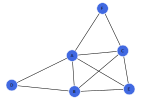

In [18]:
using LightGraphs, GraphPlot, Compose, Colors

g = SimpleGraph(6)
add_edge!(g, 1, 2)
add_edge!(g, 1, 3)
add_edge!(g, 1, 4)
add_edge!(g, 1, 5)
add_edge!(g, 1, 6)
add_edge!(g, 2, 4)
add_edge!(g, 2, 3)
add_edge!(g, 2, 5)
add_edge!(g, 3, 5)
add_edge!(g, 3, 6)

names = [l for l in "ABCDEF"]
x,y = spring_layout(g)
fig_graph = gplot(g, x, y, nodelabel=names,
    nodefillc="royalblue", nodestrokec="white", nodestrokelw=0.1,
    edgestrokec="black", EDGELINEWIDTH=0.5)

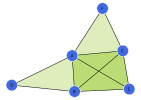

In [19]:
using Polyhedra

MINCLIQUESIZE = 2
MAXCLIQUESIZE = 5
g_cliques = maximal_cliques(g)
unitbox = UnitBox(-1.2, -1.2, +2.4, +2.4) # same as gplot unitbox

get_polygon(points) = polygon(get_hull_points(get_hull(get_coords(points))))
get_hull_points(hull) = [(i[1],i[2]) for i in hull.points.points]
get_hull(coords) = Polyhedra.planar_hull(vrep(coords))
get_coords(points) = [x[points] y[points]]

scale_opacity(clique_size) = clamp( (clique_size - MINCLIQUESIZE) / (MAXCLIQUESIZE-MINCLIQUESIZE), 0.0, 1.0 )

get_fig_clique(clique) = compose( context(), get_polygon(clique),
        fillopacity(scale_opacity(length(clique))), fill("yellowgreen") )

compose(context(units=unitbox), fig_graph, (get_fig_clique(clique) for clique in g_cliques)...)

On voit que ce graphe d'exemple est composé de trois cliques. Chaque triangle est une clique de taille 3, et le carré (ABCE) est une clique de taille 4 car ses deux diagonales sont présentes. S'il manquait une diagonale, il serait décomposé en deux cliques triangles. S'il manquait les deux diagonales, il ne serait composé d'aucune clique. Les sous-cliques ne sont pas affichées, car elles ne sont pas maximales.

Appliquons maintenant cette visualisation à la toile de confiance.

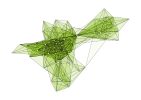

In [20]:
MINCLIQUESIZE = 2
MAXCLIQUESIZE = 20

wot = loadgraph("data/0001.lg")
wot = SimpleGraph(wot) # removes directionnality
wot_cliques = maximal_cliques(wot)
pseudos = readlines("data/pseudos.txt")

x,y = spring_layout(wot)
fig_wot = gplot(wot, x, y,
    nodefillc="lightgray", NODESIZE = 0.01,
    edgestrokec="black", EDGELINEWIDTH=0.1)
compose(context(units=unitbox), fig_wot, (get_fig_clique(clique) for clique in wot_cliques)...)

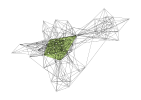

In [21]:
# animation parcourant les cliques de plus de 6 membres
MINCLIQUESIZE = 6
MAXCLIQUESIZE = 11
for clique in filter(x->length(x)>6, wot_cliques)
    display(compose(context(units=unitbox), fig_wot, get_fig_clique(clique)))
    IJulia.clear_output(true); sleep(0.05)
end

_Observations_ : on distingue trois groupes principaux qui contiennent des cliques avec peu de recouvrements. Les cliques ont des tailles variables et une grande partie sont partiellement superposées. Chaque clique s'étale sur une région du plan plutôt restreinte, ce qui est semble être un caractéristique intéressante de l'algorithme de positionnement utilisé.

Intéressons-nous maintenant aux tailles de ces cliques.

In [22]:
using Plots; plotly()

histogram(length.(wot_cliques))

On remarque que peu de cliques maximales sont de taille 3. La plupart des cliques de taille 3 sont donc contenues dans des cliques plus grandes, comme des cliques de taille 4 à 7 qui représentent 75% des cliques maximales (108/144). Examinons les deux plus grandes cliques (de taille 11).

In [23]:
pos = findall(x->x==11, length.(wot_cliques))
cat(pseudos[wot_cliques[pos[1]]], pseudos[wot_cliques[pos[2]]], dims=2)

11×2 Matrix{String}:
 "Galuel"        "Galuel"
 "cgeek"         "cgeek"
 "jeanferreira"  "jeanferreira"
 "inso"          "inso"
 "mathieuBize"   "mathieuBize"
 "cuckooland"    "cuckooland"
 "moul"          "moul"
 "gerard94"      "gerard94"
 "elois"         "elois"
 "Thatoo"        "Alfybe"
 "Paulart"       "gpsqueeek"

On remarque que ces deux cliques contiennent essentiellement les mêmes personnes, à l'exception de Thatoo, Paulart, Alfybe et gpsqueeek. Elles ont en commun un "noyau dur" de neuf personnes qui se connaissent toutes les unes les autres. Pour rassembler ces deux groupes, on pourrait rechercher les _k-cliques_ maximales, c'est-à-dire les ensemble de points qui seraient des cliques si on leur ajoutait les _k_ liens manquants. Mais pour l'instant, explorons davantage ce point de départ que sont les cliques pour voir à quel point elles peuvent apporter des éléments de définition d'une communauté.

On peut par exemple se demander ce que dirait un noeud si on lui présentait l'ensemble des cliques dans lequel il figure. En effet, dans notre cas, un noeud représente un être humain, qui est sûrement une des personnes la mieux informée sur son entourage ! L'intérêt de présenter une clique par rapport à un autre ensemble de noeuds est qu'elle représente une région locale du graphe (uniquement les voisins d'un noeud) et assez restreinte (uniquement les voisins qui se connaissent entre eux). Comme contrôle on pourrait présenter un ensemble de voisins aléatoire de même taille.

_Cet ensemble est non vide_ car chaque noeud figure dans la clique qui ne contient que lui (cas trivial) et soit cette clique est maximale, soit elle est contenue dans une clique plus grande. Par récurrence, et dans l'hypothèse d'un graphe fini, on finit par arriver à une clique maximale contenant ce noeud.

Prenons donc une clique de cet ensemble et posons au noeud la question suivante : « _cet ensemble de personnes correspond-il selon vous à une communauté ? Pourquoi ?_ ». Explorons les cheminements possibles de sa pensée et tentons d'en tirer des enseignements généraux sur le concept de communauté (numérotés et listés ci-dessous).

- je connais toutes ces personnes, elles font partie de la ğ1 (1)
    - je sais que ces personnes se connaissent (2)
        - nous nous sommes tous rencontrés ensemble à tel événement (3)
        - j'ai rencontré ces personnes à des moments différents mais sur un projet commun (4)
        - le hasard a fait que nous nous sommes rencontrés (5)
    - ces personnes se connaissent peut-être, je ne sais pas (2)
        - j'ai rencontré ces personnes dans tel contexte commun (4)
        - j'ai rencontré ces personnes dans des contextes différents (6)

1. la toile de confiance est elle-même une communauté, tout sous-groupe en fait partie (trivial, mais à noter)
2. la personne peut avoir une plus ou moins bonne vision des liens entre les personnes de son entourage
3. la notion d'événement (_interactions_ à un moment donné) peut aider à comprendre la notion de _relation_ (ensemble d'interactions), nous approfondierons ces concepts dans un prochain chapitre sur les résaux d'interactions
4. la notion d'aspect commun peut être un élément intéressant pour expliquer des communautés
5. une certaine communauté peut avoir une existence reconnue, mais non explicable par une cause extérieure (raison d'être intrinsèque)
6. un groupe peut ne pas être reconnu comme une communauté, et admettre le hasard comme explication probable

Imaginons également une liste de réponses vraisemblables permettant de nuancer la définition d'une communauté :

- Certes, nous avons interagi dans tel contexte commun, mais ce groupe est incomplet, pour parler de communauté, il faudrait ajouter telles personnes. (7)
- Oui, ce groupe est l'ensemble des personnes ayant participé à tel et tel projets. (8)
- Ce groupe a une certaine pertinence pour telle raison, mais je dirais qu'il est constitué de telle et telle communauté, qui me semblent mieux décrire la réalité du groupe. (9)
- Oui, je vois ce que vous voulez dire, mais pourquoi s'arrêter là, il y a aussi telle personne, et puis telle autre, et... (10)

7. un groupe auquel on trouve une justification évidente peut ne pas être pertinent au regard de cette justification (incomplet, intrus...)
8. un groupe identifié peut être l'intersection de deux communautés justifiées chacune par des raisons plus simples
9. un groupe peut être pertinent, mais bien moins que certaines de ses parties prises séparément
10. une communauté définie par une raison peut avoir des frontières floues, sans qu'aucun seuil naturel n'apparaisse 

Cet ensemble de propositions peut nous aider à prendre du recul sur la notion de communauté. En particulier, une communauté peut être plus ou moins pertinente au regard d'une explication donnée. Pour poursuivre notre expérience de pensée, on pourrait exposer une communauté accompagnée d'une explication à ses membres pour évaluer la pertinence de l'explication et ainsi valider ou invalider la communauté.

Il serait intéressant de réaliser en vrai cette expérience de pensée en soumettant les résultats d'algorithmes de détection de communauté au jugement de personnes capables d'évaluer ces communautés. Cela pourrait constituer une collaboration entre un laboratoire de sciences sociales et de maths/info. Dans la suite de ce chapitre, nous allons nous contenter de ce qui peut être dit sans information autre que les liens du graphe à l'instant donné.

## Matrice d'adjacence

Une représentation du graphe utile dans le cadre de la détection de communautés est sa matrice d'adjacence (ou de connectivité) $A$ dans laquelle chaque coefficient $A_{ij}$ indique la présence (1) ou l'absence (0) de lien entre les noeuds $i$ et $j$.

In [24]:
    g = SimpleGraph(8)
    add_edge!(g, 1, 2)
    add_edge!(g, 1, 3)
    add_edge!(g, 1, 4)
    add_edge!(g, 1, 5)
    add_edge!(g, 1, 6)
    add_edge!(g, 1, 7)
    add_edge!(g, 1, 8)
    add_edge!(g, 2, 4)
    add_edge!(g, 2, 3)
    add_edge!(g, 2, 5)
    add_edge!(g, 3, 5)
    add_edge!(g, 3, 6)

    A = adjacency_matrix(g)

8×8 SparseArrays.SparseMatrixCSC{Int64, Int64} with 24 stored entries:
 ⋅  1  1  1  1  1  1  1
 1  ⋅  1  1  1  ⋅  ⋅  ⋅
 1  1  ⋅  ⋅  1  1  ⋅  ⋅
 1  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 1  1  1  ⋅  ⋅  ⋅  ⋅  ⋅
 1  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅
 1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅

Pour un graphe non dirigé, cette matrice est symmétrique. Pour de grands graphes, la plupart des liens n'étant pas présents, il est avantageux de ne pas stocker les 0 qui sont donc représentés par des "⋅" (SparseMatrix).

## Concrétisation par score

En nous inspirant de ce qui vient d'être dit, essayons de concrétiser une définition souple et large d'une communauté. Si $C$ est une communauté, on aimerait pour chaque noeud définir son "taux d'appartenance" à $C$. Si le noeud appartient fortement à $C$, il devrait avoir un score élevé et s'il a un lien distant avec cette communauté, il devrait avoir un score faible. Comme tous les noeuds font partie du même graphe connexe, une appartenance négative à une quelconque communauté paraîtrait étrange. De plus, si l'on veut qu'un noeud puisse avoir un score maximal ("j'appartiens tout à fait à $C$"), il faut que ce score soit fini. Cherchons donc un score dans $[0,1]^n$ et utilisons-le comme définition d'une communauté.

Ensuite, nous aimerions pouvoir évaluer la pertinence d'une communauté avec une autre fonction de score. Chaque noeud devrait pouvoir attribuer un score à la communauté $C$ en fonction de s'il la trouve pertinente (score maximal), non pertinente (score minimal), ou s'il ne sait pas (score neutre). Cherchons donc un score local dans $[-1, 1]^n$. Le score global de la communauté peut être défini comme la moyenne de ces scores.

Voyons comment ce cadre général s'applique aux méthodes de détection de communautés existantes. Les méthodes les plus communes sont les méthodes par partitionnement. Un noeud appartient à une communauté (1) ou n'appartient pas (0), aucun noeud n'appartient à deux communautés (orthogonalité des vecteurs de score), et chaque noeud appartient à au moins une communauté (somme des vecteurs de score des communautés égale au vecteur unitaire).

### Modularité

La [modularité](https://fr.wikipedia.org/wiki/Modularit%C3%A9_(r%C3%A9seaux)) est une fonction d'évaluation d'un partitionnement de graphe. Chaque communauté $C$ obtient une note de chaque noeud $i$ égale à 0 si le noeud ne fait pas partie de la communauté (il ne "sait pas" l'évaluer) et égale à $ \frac{1}{2m} \sum_{j\in C}A_{ij}-\frac{d_id_j}{2m} $ pour tout autre noeud $j$ de $C$, avec $d_i$ le degré du noeud $i$, et $m$ le nombre total de liens du graphe. La modularité du partitionnement est égale à la somme des notes des communautés. La modularité mesure la différence entre le nombre de liens incidents sur une communauté et ce qu'aurait été ce nombre si les liens avaient été distribués aléatoirement sur le graphe tout en conservant les degrés des noeuds (modèle nul standard).

    TODO exemple d'application de la modularité

### Communicabilité

La communicabilité [[1]](#References) est une notion introduite par E.Estrada et N.Hatano qui permet de définir une distance tenant compte de tous les liens d'un graphe et qui permet d'aboutir à une définition plus souple des communautés. La distance $G_{pq}$ entre deux noeuds est donnée comme la somme des nombres de chemins de longueur $k$ entre ces deux noeuds pondérée par un facteur $\frac{1}{k!}$ (chaque somme compte $k$ fois moins que la précédente). On a donc :

$$ G_{pq} = \sum_{k=0}^{\infty}\frac{(A^k)_{pq}}{k!} = (e^A)_{pq} $$

...

In [25]:
using LinearAlgebra

A = Matrix(A) # dense version

8×8 Matrix{Int64}:
 0  1  1  1  1  1  1  1
 1  0  1  1  1  0  0  0
 1  1  0  0  1  1  0  0
 1  1  0  0  0  0  0  0
 1  1  1  0  0  0  0  0
 1  0  1  0  0  0  0  0
 1  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0

## Références

#1 [article sur la communicabilité](https://doi.org/10.1103/PhysRevE.77.036111)

[1]: https://doi.org/10.1103/PhysRevE.77.036111 "Communicability in complex networks"